<a href="https://colab.research.google.com/github/wltjr1007/pnpxai/blob/main/tutorials/lear_workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PnPXAI with Medical Dataset Tutorial

This script demonstrates the application of the PNPXAI library for explaining image classification models on the ADNI (Alzheimer's Disease Neuroimaging Initiative) dataset.

The script performs the following steps:

1. Loads the ADNI dataset from a specified repository.
2. Preprocesses the data using a pretrained image processor.
3. Initializes a ResNet-based image classification model and an explanation manager from PNPXAI.
4. Adds the LEAR (Layer-wise Relevance Analysis) explainer to the manager.
5. Extracts explanations for a sample of images using the LEAR explainer.
6. Visualizes the original images alongside the generated explanations.
7. Evaluates the quality of the explanations using MuFidelity, Sensitivity, and Complexity metrics.

This example demonstrates how to use PNPXAI to gain insights into the decision-making process of image
classification models applied to medical image analysis, specifically Alzheimer's disease classification.

Dependencies:
- PNPXAI
- Datasets
- Transformers
- Matplotlib
- Torch
- Pytorch Vision

In [ ]:
!git clone https://github.com/wltjr1007/pnpxai
!cd /content/pnpxai && pip install -e . && pip install datasets

import sys
sys.path.append('/content/pnpxai')

In [ ]:
import matplotlib.pyplot as plt
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader

from pnpxai import AutoExplanationForImageClassification
from pnpxai.evaluator.metrics import MuFidelity, Sensitivity, Complexity

from transformers import AutoImageProcessor, ResNetForImageClassification
from pnpxai.explainers import LEAR

from torch import Tensor

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

DATA_REP = "wltjr1007/MRI"
MODEL_REP = "evanrsl/resnet-Alzheimer"

In [ ]:
def transform(examples):
    examples["pixel_values"] = [processor(images=img.convert("RGB"), return_tensors="pt")["pixel_values"].squeeze(0) for img in examples["image"]]
    del examples["image"]
    return examples

dataset = load_dataset(DATA_REP)['test'].with_transform(transform)
num_classes = dataset.features["label"].num_classes
loader = DataLoader(dataset, batch_size=4, shuffle=False)
processor = AutoImageProcessor.from_pretrained(MODEL_REP)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/461 [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

In [ ]:
class ResNetBase(ResNetForImageClassification):
    def forward(self, *args, **kwargs):
        return super().forward(*args, **kwargs)[0]

model = ResNetBase.from_pretrained(MODEL_REP, return_dict=False).to(device)

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/94.3M [00:00<?, ?B/s]

In [ ]:
expr = AutoExplanationForImageClassification(
    model=model,
    data=loader,
    input_extractor=lambda batch: batch['pixel_values'].to(device),
    label_extractor=lambda batch: batch['label'].to(device),
    target_extractor=lambda outputs: outputs.argmax(-1).to(device),
    target_labels=False,  # target prediction if False
)

lear_model = LEAR(model=model)

expr.manager.add_explainer(lear_model)

/content/pnpxai/pnpxai/evaluator/metrics/sensitivity.py:39: UserWarning: [Sensitivity] explainer is not provided. Please set explainer before evaluate.
  warnings.warn('[Sensitivity] explainer is not provided. Please set explainer before evaluate.')


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

configuration_conditional_unet.py:   0%|          | 0.00/304 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/wltjr1007/LEAR:
- configuration_conditional_unet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_conditional_unet.py:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/wltjr1007/LEAR:
- modeling_conditional_unet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/294M [00:00<?, ?B/s]

13

In [ ]:
# Extract Explanations
data_sample = next(iter(loader))
inputs = data_sample['pixel_values'].to(device)
labels = data_sample['label'].to(device)

explanations = {}
for explainer in expr.manager.explainers:
    try:
        name = explainer.__class__.__name__
        explanations[name] = [explainer.attribute(inputs, torch.full_like(labels, lbl)) for lbl in range(num_classes)]
    except:
        print("ERR", name)
        pass

ERR GradCam


/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


ERR GuidedGradCam


/usr/local/lib/python3.10/dist-packages/captum/attr/_core/lime.py:1109: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/captum/attr/_core/lime.py:1109: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/captum/attr/_core/lime.py:1109: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  warnings.warn(
/usr

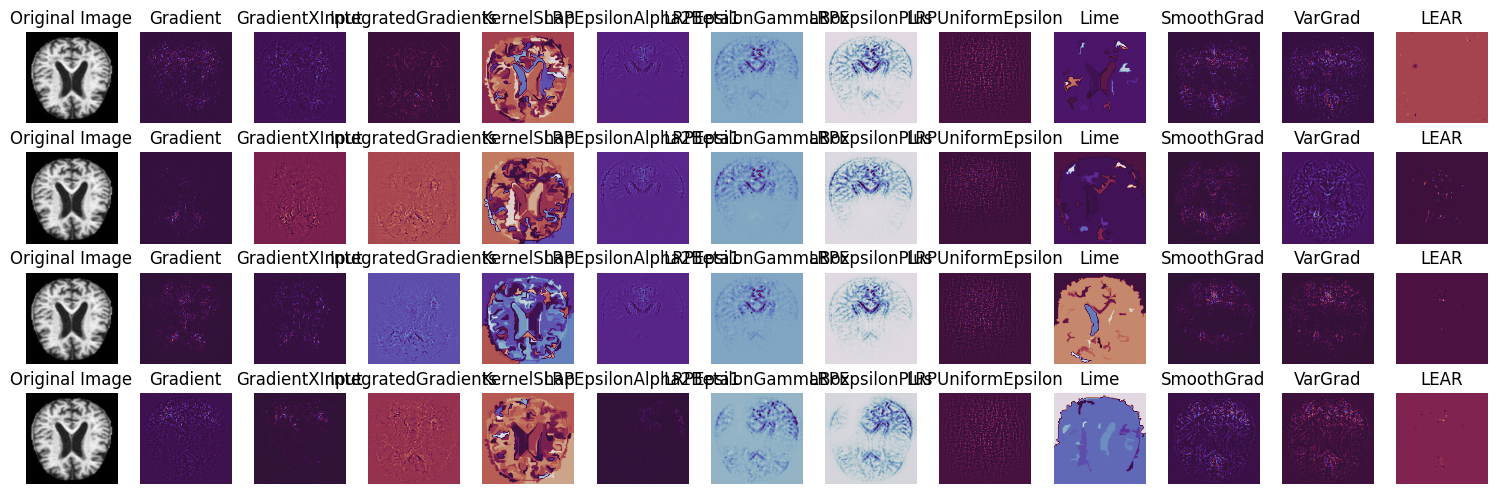

In [ ]:
# Updated Visualization
img_to_np = lambda img: img.permute(1, 2, 0).cpu().detach().numpy()

def denormalize_image(inputs, mean, std):
    res = inputs * torch.tensor(std, device=inputs.device)[:, None, None] + torch.tensor(mean, device=inputs.device)[:, None, None]
    return img_to_np(res)

def postprocess_attr(attr):
    postprocessed = attr.permute((1, 2, 0)).sum(dim=-1)
    attr_min, attr_max = postprocessed.min(), postprocessed.max()
    return ((postprocessed - attr_min) / (attr_max - attr_min)).cpu().detach().numpy()

# Overlay function
def overlay_attr_on_image(image, attr, alpha=0.5, colormap="jet"):
    import matplotlib.cm as cm
    attr_colormap = cm.get_cmap(colormap)(attr)[..., :3]
    return (1 - alpha) * image + alpha * attr_colormap

ncols = len(explanations) + 1
fig, axes = plt.subplots(num_classes, ncols, figsize=(15, 5))

for lbl in range(num_classes):
    # Original image
    img = denormalize_image(inputs[0], mean=processor.image_mean, std=processor.image_std)
    axes[lbl, 0].imshow(img)
    axes[lbl, 0].axis("off")
    axes[lbl, 0].set_title("Original Image")

    # Overlay explanations
    for idx, (name, attr) in enumerate(explanations.items(), start=1):
        processed_attr = postprocess_attr(attr[lbl][0])
        # overlay_img = overlay_attr_on_image(img, processed_attr)
        axes[lbl, idx].imshow(processed_attr, cmap="twilight")
        axes[lbl, idx].axis("off")
        axes[lbl, idx].set_title(name)

plt.tight_layout()
plt.savefig("ADNI.png", dpi=300)
plt.show()


In [ ]:
from pnpxai.evaluator.metrics import MuFidelity, Sensitivity, Complexity

# Initialize metrics
mufd = MuFidelity(
    model=model,
    explainer=None,  # Can set explainer here if desired
    n_perturb=150,  # Correct parameter name
    noise_scale=0.2,  # Noise scale for perturbations
    batch_size=32,  # Batch size for evaluation
    grid_size=9,  # Perturbation grid size
    baseline=0.0  # Baseline value for masking
)

sens = Sensitivity(
    model=model,
    explainer=lear_model,  # Can set explainer here if desired
    n_iter=10,  # Number of iterations
    epsilon=0.2  # Magnitude of random uniform noise
)

cmpx = Complexity(
    model=model,
    explainer=None,  # Can set explainer here if desired
    n_bins=10  # Number of bins for histogram computation
)

# Example metric evaluations
mufd_score = mufd.evaluate(inputs=inputs, targets=labels, attributions=explanations["LEAR"][0])
sens_score = sens.evaluate(inputs=inputs, targets=labels, attributions=explanations["LEAR"][0])
cmpx_score = cmpx.evaluate(inputs=inputs, targets=labels, attributions=explanations["LEAR"][0])

print("MuFidelity:", mufd_score.mean().item())
print("Sensitivity:", sens_score.mean().item())
print("Complexity:", cmpx_score.mean().item())

MuFidelity: 0.012694786434952664
Sensitivity: 1.0744471549987793
Complexity: 0.05687576569415988
